In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt

In [16]:
def robustness_failure_node(g, simulations=50):
	N = g.vcount()

	number_removed = np.zeros(N+1)
	for i in range(g.vcount()):
		number_removed[i] = i / float(N)
	number_removed[N] = 1.0

	P_infty = np.zeros(N+1)

	# Find larger component
	cl = g.components()
	P_infty_baseline = float(max(cl.sizes()))

	for sim in range(simulations):
		g_copy = g.copy()
		P_infty[0] += 1.0

		count = 1
		while(g_copy.vcount() > 0):
			index = int(random.random() * g_copy.vcount())
			g_copy.delete_vertices(index)

			cl = g_copy.components()
			if(len(cl) > 0):
				P_infty[count] += float(max(cl.sizes())) / P_infty_baseline
			else:
				P_infty[count] += 0.0

			count = count + 1

	# Compute the average
	P_infty = P_infty / float(simulations)

	return number_removed,P_infty

In [17]:
def robustness_stats_node(g, stat_array):
	# Make a copy of the network
	g_copy = g.copy()

	N = g_copy.vcount()

	number_removed = np.zeros(N+1)
	for i in range(g.vcount()):
		number_removed[i] = i / float(N)
	number_removed[N] = 1.0


	P_infty = np.zeros(N+1)

	# Find larger component
	cl = g_copy.components()
	P_infty_baseline = float(max(cl.sizes()))

	P_infty[0] = 1.0

	count = 1
	while(g_copy.vcount() > 0 and count < len(stat_array)):
		index = g_copy.vs.find(label=stat_array[count-1][0]).index

		g_copy.delete_vertices(index)

		cl = g_copy.components()

		if(len(cl) > 0):
			P_infty[count] += float(max(cl.sizes())) / P_infty_baseline
		else:
			P_infty[count] += 0.0

		count = count + 1

	if(count < g.vcount()):
		number_removed = number_removed[0:count]
		P_infty = P_infty[0:count]

	return number_removed,P_infty

In [31]:
# 1) Gere uma rede pelo modelo Barabasi-Albert no igraph:
g = ig.Graph.Barabasi(1000, 3)

# 2) Crie um atributo em cada nó, para armazenar um "nome" para o nó (pode ser o próprio índice dele na rede).
lista_com_nomes = [i for i in range(g.vcount())]
#print(lista_com_nomes)
g.vs['label'] = lista_com_nomes

# 3) Calcule os graus dos nós e guarde em uma lista contendo pares (nome_nó, grau).

stat_array = []
for i in range(g.vcount()):
  stat_array.append( ( g.vs['label'][i], float(g.degree(i)) ) )
print(stat_array)

# 4) Ordene a lista dos graus de forma decrescente (maior para o menor).

dtype = [('label', int), ('metric', float)]
stat_array = np.array(stat_array, dtype=dtype)
stat_array = np.sort(stat_array, order='metric') # aqui eu ordeno pela métrica (no caso o grau)
stat_array = np.flip(stat_array)
print(stat_array)

# 5) Remova os nós um a um, de acordo com a lista ordenada, a partir dos seus nomes.

n_ataque, cg_ataque = robustness_stats_node(g, stat_array)
n_falha, cg_falha = robustness_failure_node(g, simulations=50)

# A função robustness_stats_node(g, stat_array) da linha 98 (https://github.com/vanderfreitas/network_robustness/blob/master/src/robustness/robustness.py) resolve o problema. Ela recebe por parâmetro uma rede g e a lista ordenada com a métrica (stat_array).

# 6) Para simular as falhas aleatórias, basta usar a função robustness_failure_node(g, simulations=50) do mesmo repositório (linha 27). Ela é muito parecida com a função do passo 5, mas com a diferença de que os nós são escolhidos ao acaso.

[(0, 45.0), (1, 21.0), (2, 72.0), (3, 47.0), (4, 37.0), (5, 30.0), (6, 38.0), (7, 32.0), (8, 24.0), (9, 30.0), (10, 45.0), (11, 53.0), (12, 34.0), (13, 32.0), (14, 23.0), (15, 17.0), (16, 30.0), (17, 17.0), (18, 9.0), (19, 10.0), (20, 17.0), (21, 26.0), (22, 5.0), (23, 14.0), (24, 11.0), (25, 27.0), (26, 17.0), (27, 19.0), (28, 35.0), (29, 13.0), (30, 34.0), (31, 15.0), (32, 26.0), (33, 9.0), (34, 22.0), (35, 12.0), (36, 19.0), (37, 25.0), (38, 4.0), (39, 13.0), (40, 25.0), (41, 29.0), (42, 12.0), (43, 11.0), (44, 6.0), (45, 19.0), (46, 29.0), (47, 10.0), (48, 7.0), (49, 7.0), (50, 28.0), (51, 5.0), (52, 10.0), (53, 16.0), (54, 16.0), (55, 17.0), (56, 18.0), (57, 18.0), (58, 3.0), (59, 11.0), (60, 14.0), (61, 10.0), (62, 12.0), (63, 17.0), (64, 21.0), (65, 8.0), (66, 4.0), (67, 15.0), (68, 8.0), (69, 10.0), (70, 14.0), (71, 10.0), (72, 18.0), (73, 6.0), (74, 8.0), (75, 11.0), (76, 15.0), (77, 9.0), (78, 9.0), (79, 8.0), (80, 18.0), (81, 11.0), (82, 11.0), (83, 8.0), (84, 11.0), (85, 17

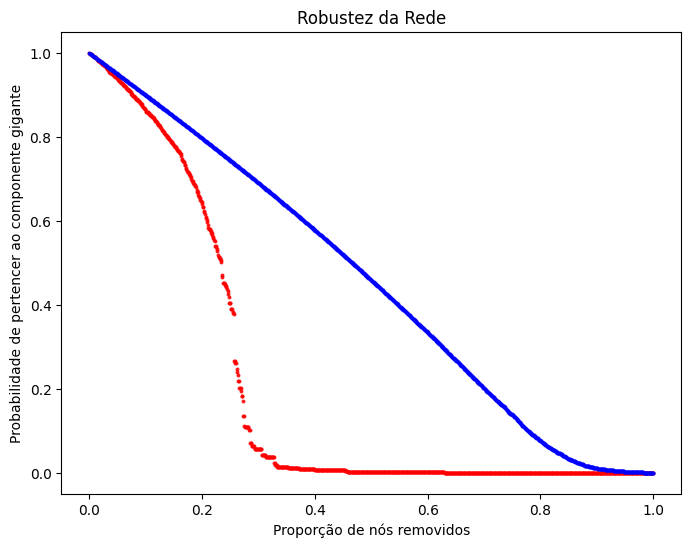

In [33]:
import matplotlib.pyplot as plt

# Plotar o gráfico com bolinhas mais definidas
plt.figure(figsize=(8, 6))
plt.scatter(
    n_ataque,
    cg_ataque,
    color='red',
    s=7,           # Tamanho das bolinhas
    alpha=0.9,      # Transparência (mais próximo de 1 deixa mais sólido)
    edgecolor='red',  # Cor da borda para definir melhor as bolinhas
    linewidth=0.1   # Espessura da borda
)
plt.scatter(
    n_falha,
    cg_falha,
    color='blue',
    s=7,           # Tamanho das bolinhas
    alpha=0.9,      # Transparência (mais próximo de 1 deixa mais sólido)
    edgecolor='blue',  # Cor da borda para definir melhor as bolinhas
    linewidth=0.1   # Espessura da borda
)

# Adicionar rótulos e título
plt.xlabel("Proporção de nós removidos")
plt.ylabel("Probabilidade de pertencer ao componente gigante")
plt.title("Robustez da Rede")

# Exibir o gráfico
plt.show()


